In [1]:
import numpy as np
import crsutil as crs
import tleplot as tle
import matplotlib.pyplot as plt
import cmocean

#%matplotlib qt


In [11]:
tle.tleget('resource')

Saving TLE set to default name
TLEGET: Downloaded resource.txt from http://celestrak.com/NORAD/elements/
Saved TLE to resource.txt


'resource.txt'

In [16]:
gpsERS = tle.tleread('resource.txt',verbose=0)
t = tle.tledatenum(['2021-11-20 0:00:00', 6*60 ,1])
xsat,vsat = tle.tle2vec(gpsERS,t,'RADARSAT-2')
xsate,vsate = crs.eci2ecef(t,xsat=xsat,vsat=vsat)
xsat_noJ2,vsat_noJ2 = tle.tle2vec(gpsERS,t,'RADARSAT-2',propagation="NOJ2")
xsate_noJ2,vsate_noJ2 = crs.eci2ecef(t,xsat=xsat_noJ2,vsat=vsat_noJ2,)


To plot the difference between orbits with and without the J2 effect considered both are added to the same plot

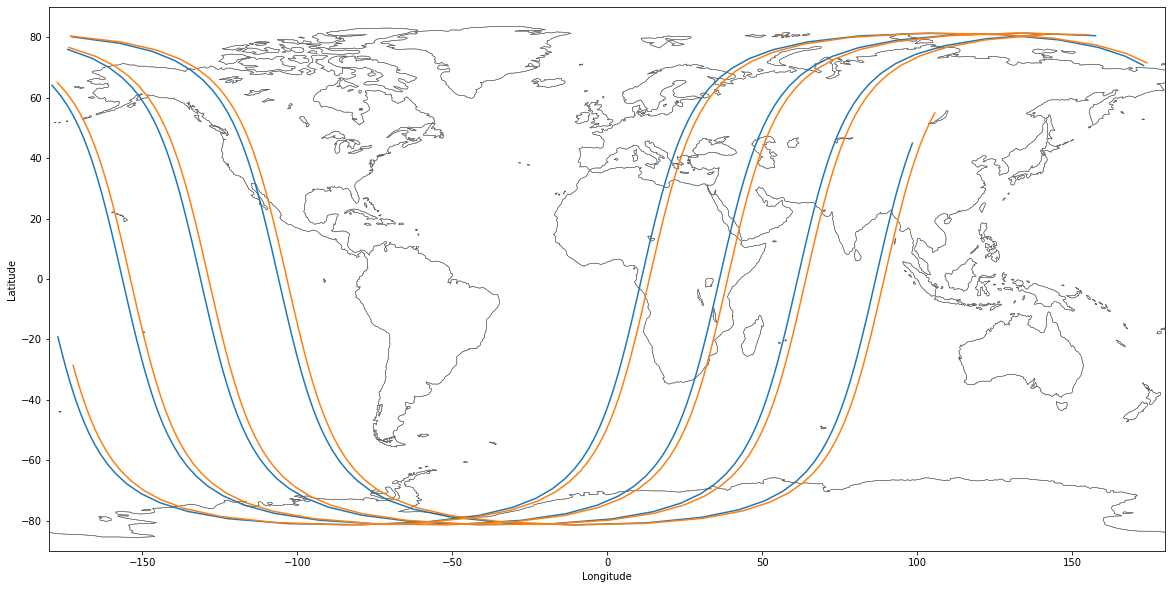

In [20]:
plt.figure(figsize=(20,10))
tle.pltgroundtrack(xsate)
tle.pltgroundtrack(xsate_noJ2)

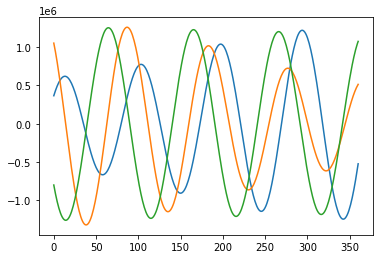

In [21]:
j2_noj2_diff = xsate-xsate_noJ2
plt.plot(j2_noj2_diff)

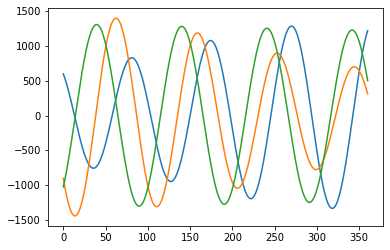

In [22]:
plt.plot(vsate-vsate_noJ2)

array([ 90.35642572,  94.33438729,  98.11646528, ...,  98.41658321,
       101.98644687, 105.36049693])